In [171]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [172]:
epsilon = 1e-3
#define placeholder for input
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [173]:
savePath = "mnist_model.ckpt/"

In [174]:
def compute_accuracy(v_x, v_y):
    global prediction
    #input v_x to nn and get the result with y_pre
    y_pre = sess.run(final_output, feed_dict={x:v_x})
    #find how many right
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_y,1))
    #calculate average
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #get input content
    result = sess.run(accuracy,feed_dict={x: v_x, y: v_y})
    return result

In [175]:
def add_layer(inputs, in_size, out_size, activation_function=None,):
    print("Adding Layer")
    # add one more layer and return the output of this layer
    stddev_calculated = math.sqrt(2/in_size)
    Weights = tf.Variable(tf.truncated_normal([in_size, out_size],stddev=stddev_calculated))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    batch_mean2, batch_var2 = tf.nn.moments(Wx_plus_b, [0])
    scale = tf.Variable(tf.ones([out_size]))
    beta2 = tf.Variable(tf.zeros([out_size]))
    batch_normalization = tf.nn.batch_normalization(Wx_plus_b, batch_mean2, batch_var2, beta2, scale,epsilon)
    if activation_function is None:
        outputs = batch_normalization
    else:
        outputs = activation_function(batch_normalization,)
    return outputs
 

In [176]:
print("Creating Dataset")
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Creating Dataset
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [177]:
print("Creating Network")
#add layer
input_layer = add_layer(x, 784, 1024, activation_function=tf.nn.relu)
hidden_layer1 = add_layer(input_layer, 1024, 1024, activation_function=tf.nn.relu)
hidden_layer2 = add_layer(hidden_layer1, 1024, 1024, activation_function=tf.nn.relu)
hidden_layer3 = add_layer(hidden_layer2, 1024, 1024, activation_function=tf.nn.relu)
hidden_layer4 = add_layer(hidden_layer3, 1024, 1024, activation_function=tf.nn.relu)
hidden_layer5 = add_layer(hidden_layer4, 1024, 1024, activation_function=tf.nn.relu)
final_output    = add_layer(hidden_layer5, 1024, 10, activation_function=tf.nn.softmax)
    
#calculate the loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(final_output), reduction_indices=[1]))*100
    
#use AdamOptimizer and learning rate decay
step = tf.Variable(0, trainable=False)
rate = tf.train.exponential_decay(0.001, step, 1, 0.9999)
train_step = tf.train.AdamOptimizer(learning_rate=rate).minimize(cross_entropy)

Creating Network
Adding Layer
Adding Layer
Adding Layer
Adding Layer
Adding Layer
Adding Layer
Adding Layer


In [178]:
#init session
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()

print("Training Deep Neural Network")
with tf.Session() as sess:
    saver=tf.train.Saver()
    #initialize all variables
    sess.run(init)
    #start training
    for i in range(5000):
        #Use Minibatch
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train_step,feed_dict={x: batch_x, y: batch_y})
        if i % 500 == 0:
            print("Epoch: ",i,end=" ->\t")
            print("Accuracy: ",100* compute_accuracy(mnist.test.images, mnist.test.labels),end=" ")
            print("%")
            print("Saving Model")
            saver.save(sess,savePath)
    saver.save(sess,savePath)
    print("Finished")




Training Deep Neural Network
Epoch:  0 ->	Accuracy:  59.4900012016 %
Saving Model
Epoch:  500 ->	Accuracy:  96.9799995422 %
Saving Model
Epoch:  1000 ->	Accuracy:  97.310000658 %
Saving Model
Epoch:  1500 ->	Accuracy:  97.7900028229 %
Saving Model
Epoch:  2000 ->	Accuracy:  97.7800011635 %
Saving Model
Epoch:  2500 ->	Accuracy:  97.4600017071 %
Saving Model
Epoch:  3000 ->	Accuracy:  97.6700007915 %
Saving Model
Epoch:  3500 ->	Accuracy:  97.990000248 %
Saving Model
Epoch:  4000 ->	Accuracy:  97.9700028896 %
Saving Model
Epoch:  4500 ->	Accuracy:  98.0099976063 %
Saving Model
Finished


In [179]:
sample = random.sample(range(0,len(mnist.test.images)),1000)

In [180]:
#PART 3 and 4
def lastLayerPlot(lastLayer):
    dic = {}
    fig,axis = plt.subplots(10,10)
    for i in range(0,len(lastLayer)):
        if lastLayer[i] in dic:
            dic[lastLayer[i]].append(sample[i])
        else:
            dic[lastLayer[i]] = [sample[i]]
            
    for i in dic.keys():
        for j in range(10):
            axis[i,j].imshow(mnist.test.images[dic[i][j],:].reshape(28,28))
    #plt.show()
    


#PART 4 -> for hidden layer 
def hiddenLayerPlots(layer):
    dic = {}
    dic2 = {}
    count = 0
    fig,axis = plt.subplots(10,10)
    for i in range(0,len(layer)):
        if layer[i] in dic:
            dic[layer[i]].append(sample[i])
        else:
            dic[layer[i]] = [sample[i]]
            
            
    for key in dic.keys():
        if key not in dic2.keys():
            dic2[key] = count
            count = count + 1
    
    for i in dic.keys():
        if dic2[i]>=10:
            break
        for j in range(len(dic[i])):
            if j<10:
                axis[dic2[i], j].imshow(mnist.test.images[dic[i][j], :].reshape(28, 28))
    
    #plt.show()

def getTrainedOutputs():    
    #val = []
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        saver = tf.train.Saver()
        saver.restore(sess,savePath)
        output_final_layer   = sess.run(final_output, feed_dict={x:mnist.test.images[sample]})
        output_hidden_layer1 = sess.run(hidden_layer1, feed_dict={x:mnist.test.images[sample]})
        output_hidden_layer2 = sess.run(hidden_layer2, feed_dict={x:mnist.test.images[sample]})
        output_hidden_layer3 = sess.run(hidden_layer3, feed_dict={x:mnist.test.images[sample]})
        output_hidden_layer4 = sess.run(hidden_layer4, feed_dict={x:mnist.test.images[sample]})
        output_hidden_layer5 = sess.run(hidden_layer5, feed_dict={x:mnist.test.images[sample]})
        lastLayer = sess.run(tf.argmax(output_final_layer,1))
        #final layer   
        print("Plot Order:")
        print("Last Layer - Hidden Layer 5 - Hidden Layer 4 - Hidden Layer 3 - Hidden Layer 2 - Hidden Layer 1")
        lastLayerPlot(lastLayer)
        hiddenLayerPlots(sess.run(tf.argmax(output_hidden_layer5,1)))
        hiddenLayerPlots(sess.run(tf.argmax(output_hidden_layer4,1)))
        hiddenLayerPlots(sess.run(tf.argmax(output_hidden_layer3,1)))
        hiddenLayerPlots(sess.run(tf.argmax(output_hidden_layer2,1)))
        hiddenLayerPlots(sess.run(tf.argmax(output_hidden_layer1,1)))
        plt.show()
        print("DONE")

INFO:tensorflow:Restoring parameters from mnist_model.ckpt/
Plot Order:
Last Layer - Hidden Layer 5 - Hidden Layer 4 - Hidden Layer 3 - Hidden Layer 2 - Hidden Layer 1


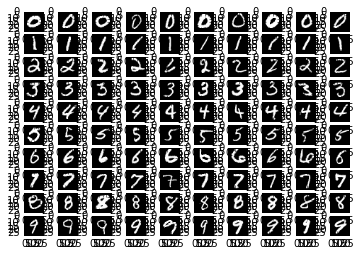

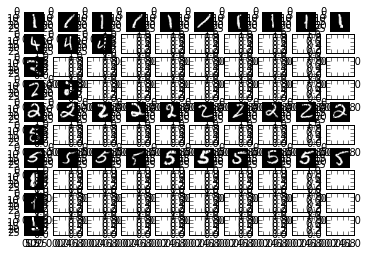

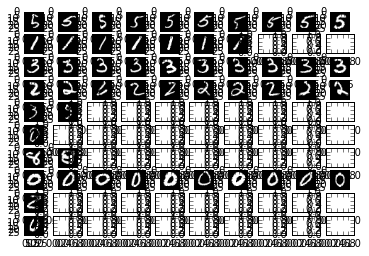

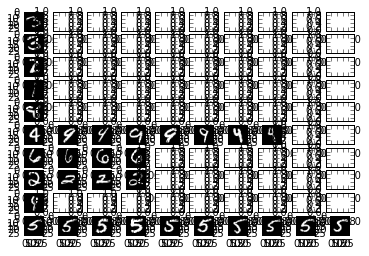

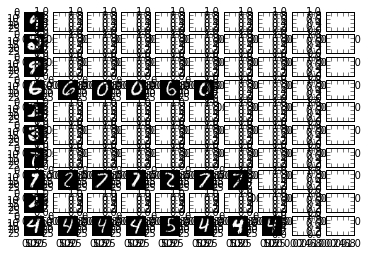

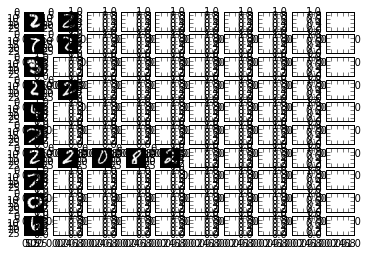

DONE


In [181]:
getTrainedOutputs()

In [182]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

sample=random.sample(range(0,len(mnist.test.images)),1000)



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [183]:
#pca does linear transform tsne is non linear transform
def plot(layer):
    pca = PCA(n_components=2)
    if(layer == 0):
        print("PCA and tSNE for MNIST DATA")
        temp = pca.fit_transform(mnist.test.images[sample])
        temp_tsne = TSNE(n_components=2).fit_transform(mnist.test.images[sample])
        temp_tsne=temp_tsne.T

        temp=temp.T
        fig,axis=plt.subplots(1,2)
        axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = plt.cm.spectral)
        axis[0].set_title('PCA')
        axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = plt.cm.spectral)
        axis[1].set_title('tSNE')
        plt.show()
    elif(layer == 1):
        print("PCA and tSNE for Layer 1")
        temp=pca.fit_transform(output_hidden_layer1)
        temp_tsne = TSNE(n_components=2).fit_transform(mnist.test.images[sample])
        temp_tsne=temp_tsne.T


        temp=temp.T
        fig,axis=plt.subplots(1,2)
        axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = plt.cm.spectral)
        axis[0].set_title('PCA -Layer 1')
        axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = plt.cm.spectral)
        axis[1].set_title('tSNE -Layer1')

        plt.show()
    elif(layer == 2):
        print("PCA and tSNE for Layer 2")
        temp = pca.fit_transform(output_hidden_layer2)
        temp_tsne = TSNE(n_components=2).fit_transform(mnist.test.images[sample])
        temp_tsne = temp_tsne.T


        temp = temp.T
        fig,axis=plt.subplots(1,2)
        axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = plt.cm.spectral)
        axis[0].set_title('PCA -Layer 2')
        axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = plt.cm.spectral)
        axis[1].set_title('tSNE -Layer 2')
        plt.show()
    elif(layer == 3):
        print("PCA and tSNE for Layer 3")
        temp = pca.fit_transform(output_hidden_layer3)
        temp_tsne = TSNE(n_components=2).fit_transform(mnist.test.images[sample])
        temp_tsne = temp_tsne.T

        temp = temp.T
        fig,axis=plt.subplots(1,2)
        axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = plt.cm.spectral)
        axis[0].set_title('PCA -Layer 3')
        axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = plt.cm.spectral)
        axis[1].set_title('tSNE -Layer 3')

        plt.show()
    elif(layer == 4):
        print("PCA and tSNE for Layer 4")
        temp = pca.fit_transform(output_hidden_layer4)
        temp_tsne = TSNE(n_components=2).fit_transform(mnist.test.images[sample])
        temp_tsne=temp_tsne.T
        temp=temp.T
        fig,axis=plt.subplots(1,2)
        axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = plt.cm.spectral)
        axis[0].set_title('PCA -Layer 4')
        axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = plt.cm.spectral)
        axis[1].set_title('tSNE -Layer 4')
        plt.show()
    elif(layer == 5):
        print("PCA and tSNE for Layer 5")
        temp = pca.fit_transform(output_hidden_layer5)
        temp_tsne = TSNE(n_components=2).fit_transform(mnist.test.images[sample])
        temp_tsne=temp_tsne.T
        temp = temp.T
        fig,axis=plt.subplots(1,2)
        axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = plt.cm.spectral)
        axis[0].set_title('PCA -Layer 5')
        axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = plt.cm.spectral)
        axis[1].set_title('tSNE -Layer 5')

        plt.show()

PCA and tSNE for MNIST DATA


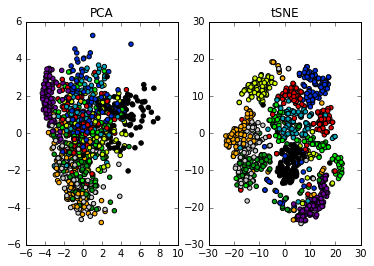

PCA and tSNE for Layer 1


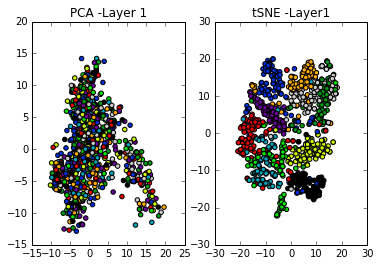

PCA and tSNE for Layer 2


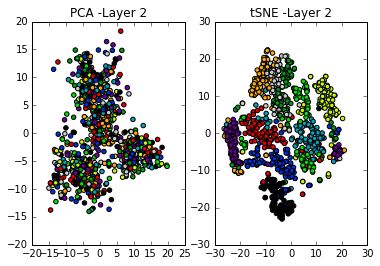

PCA and tSNE for Layer 3


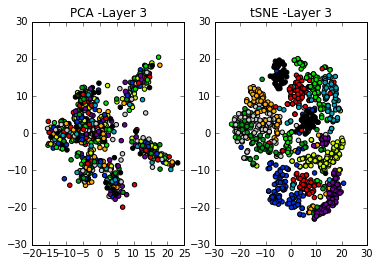

PCA and tSNE for Layer 4


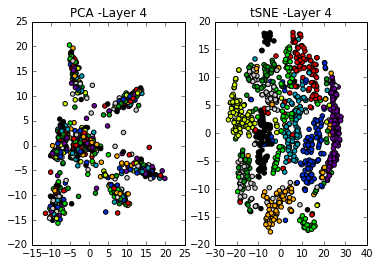

PCA and tSNE for Layer 5


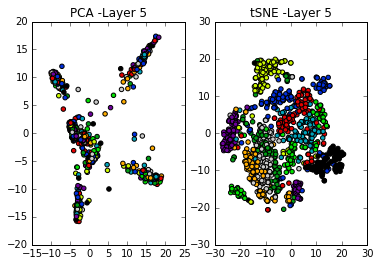

In [184]:
"""
Plotting PCA and tSNE for MNIST.
"""
for i in range(6):
    plot(i)

In [185]:
import numpy as np
from sklearn.datasets import fetch_mldata
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import time
from sklearn.manifold import TSNE

(70000, 784)
(70000,)
Size of the Dataframe: (70000, 785)


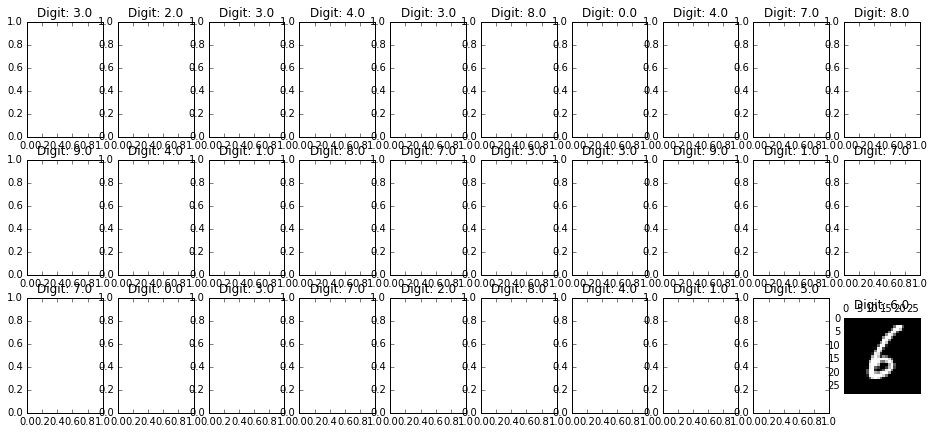

In [186]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape)
print(y.shape)


feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the Dataframe: {}'.format(df.shape))

rndperm = np.random.permutation(df.shape[0])
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [187]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.09746116  0.07155445  0.06149531]


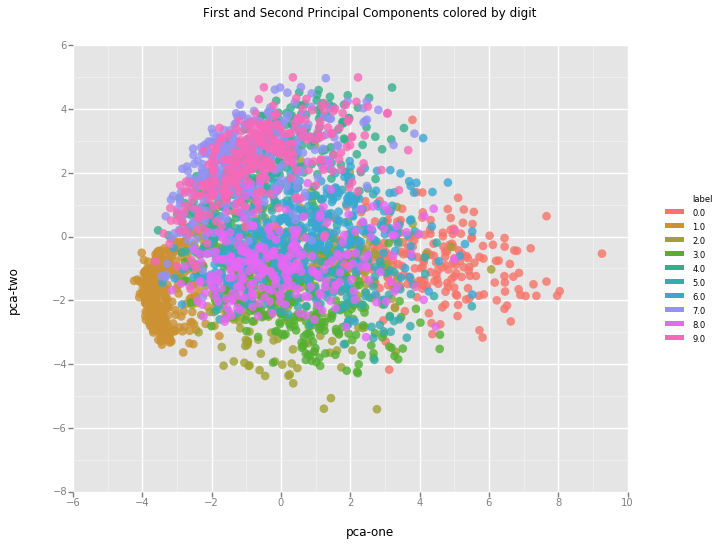

<ggplot: (-9223371887106330736)>

In [188]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [189]:
n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.240769
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.362475
[t-SNE] Error after 300 iterations: 1.362475
t-SNE done! Time elapsed: 631.1502788066864 seconds


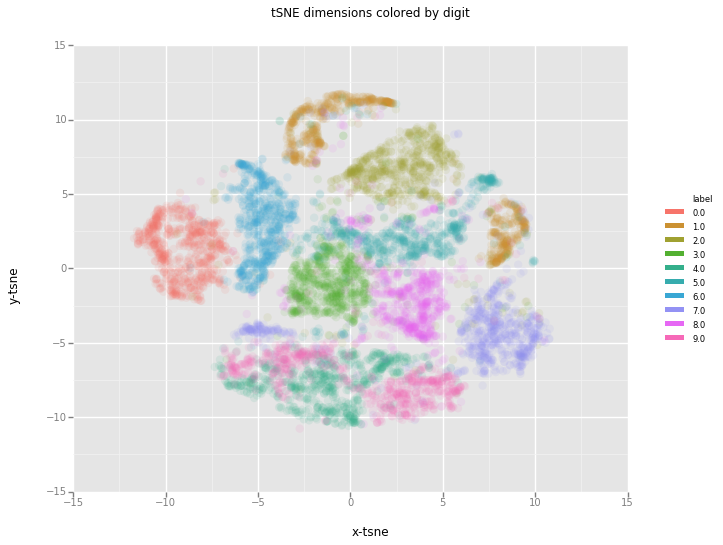

<ggplot: (-9223371887045640290)>

In [190]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [191]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

print ('Explained variation per principal component (PCA): {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Explained variation per principal component (PCA): 0.8253790868803637
